In [1]:
# 1.30'

from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
df1=pd.read_csv('./training set values.csv', sep=',')
df_target = pd.read_csv("./training set labels.csv")
df1 =pd.merge(df1, df_target, on='id', how='inner')
del df_target
df2 = df1.copy() # no es lo mismo que hacer df2 = df1


In [3]:
# Veo que hay algunas columnas con ceros que no son missings
# Busco cuales son 
zero_searcher(df1)


['id',
 'amount_tsh',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'num_private',
 'district_code',
 'population',
 'public_meeting',
 'permit',
 'construction_year']

In [4]:
from_zero_to_nan = ['funder','gps_height','installer','longitude','construction_year']


In [5]:
print("Reemplazamos ceros por Nulos")
for fn in from_zero_to_nan:
    a = df2[fn].isnull().sum()
    df2[fn].replace(('0', 0), (np.nan), inplace = True)   # '0' para categóricas y 0 para numéricas
    b = df2[fn].isnull().sum()
    print("diferencia de nulos entre antes y después en ",fn,  b-a)
    del a
    del b

Reemplazamos ceros por Nulos
diferencia de nulos entre antes y después en  funder 777
diferencia de nulos entre antes y después en  gps_height 20438
diferencia de nulos entre antes y después en  installer 777
diferencia de nulos entre antes y después en  longitude 1812
diferencia de nulos entre antes y después en  construction_year 20709


In [6]:
df2.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year        float64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [7]:
lista_col = df2.columns.tolist()
lista_col

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [8]:
""" plt.hist(df2['amount_tsh'], bins=10, color='blue', alpha=0.7)

# Personalizar el histograma
plt.title('Histograma de amount_tsh')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el histograma
plt.show()
 """

" plt.hist(df2['amount_tsh'], bins=10, color='blue', alpha=0.7)\n\n# Personalizar el histograma\nplt.title('Histograma de amount_tsh')\nplt.xlabel('Valor')\nplt.ylabel('Frecuencia')\nplt.grid(True)\n\n# Mostrar el histograma\nplt.show()\n "

In [9]:
# Iteramos la funcion que muestra visualmente los datos para poder modificarlos si fuera necesario
i = 0

-------------- ID ---------------
count    59400.000000
mean     37115.131768
std      21453.128371
min          0.000000
25%      18519.750000
50%      37061.500000
75%      55656.500000
max      74247.000000
Name: id, dtype: float64
id
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  0
ceros:  1


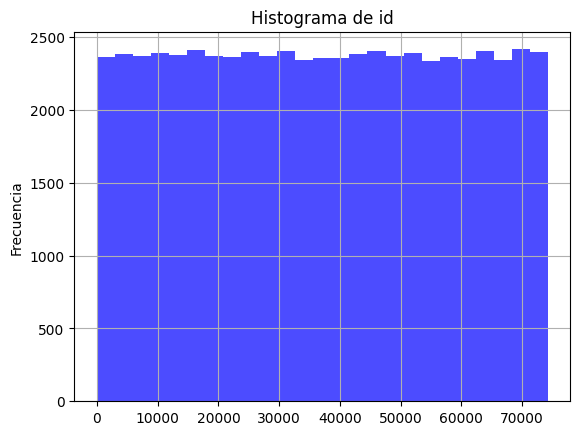

---------------------------------------------


In [10]:
# Exploramos los datos uno a uno. Los datos se muestran de una forma u otra si son numéricos o categóricos
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
# Dado que no se que expresa lo conservo. 

-------------- AMOUNT_TSH ---------------
count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64
amount_tsh
Atípicos inferiores: 0.0
Atípicos superiores: 18.722222222222225
% valores atípicos: 18.722222222222225
missings:  0
ceros:  41639


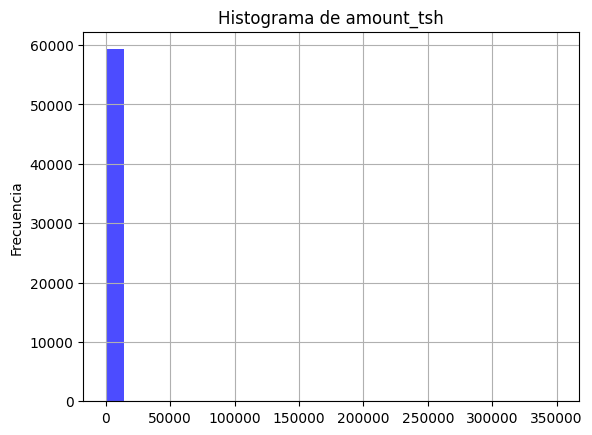

---------------------------------------------


In [11]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1

In [12]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
else:
    df2[lista_col[i]].info
    print("datatime")

i = i + 1

datatime


-------------- FUNDER ---------------
count                      54986
unique                      1895
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object
NaN:    4414
none:   0
ceros:  0
-------------- Head y Tail ---------------
funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref 

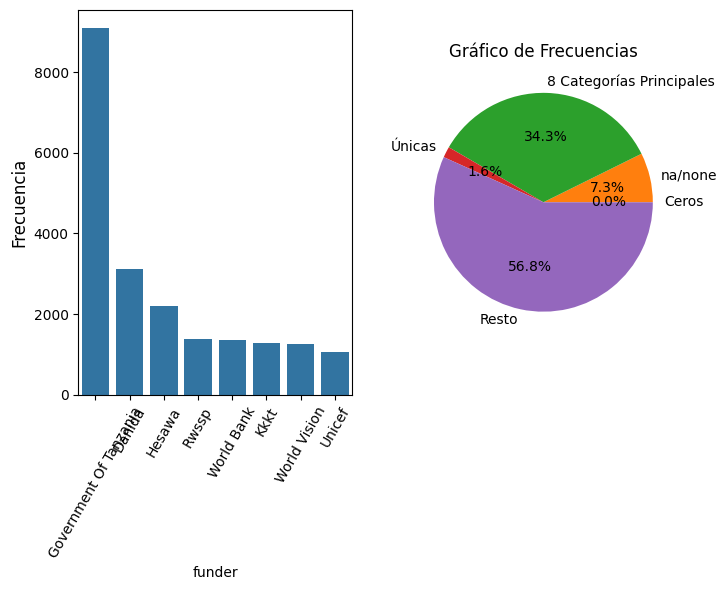

---------------------------------------------


In [13]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'):
        descripcion_categorica(df2, lc, 30) # 30 para ver más resultados
    else:                           
        descripcion_numerica(df2, lc)
i = i + 1

-------------- GPS_HEIGHT ---------------
count    38962.000000
mean      1018.860839
std        612.566092
min        -90.000000
25%        393.000000
50%       1167.000000
75%       1498.000000
max       2770.000000
Name: gps_height, dtype: float64
gps_height
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  20438
ceros:  0


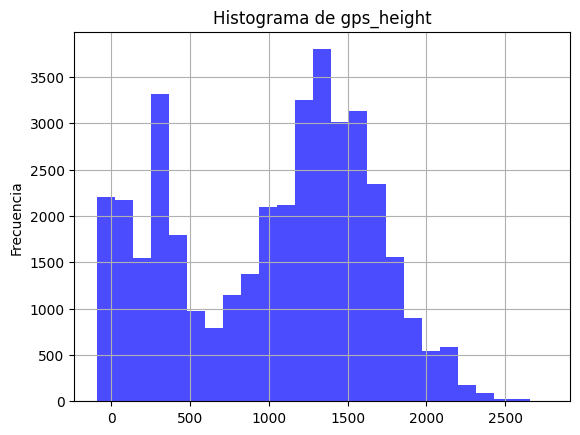

---------------------------------------------


In [14]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1

In [15]:
# No debería de haber pozos a menos de 0m de altura
negativos = df2[df2['gps_height'] < 0]['gps_height']
negativos.info()
negativos.head(10)
negativos.describe()
# Observando un mapa del relieve, no encuentro ninguna cuenca como en Paises Bajos. 
# Dado que la altura a la que se instala una bomba puede influye para la cavitación y el desgaste voy a poner estos datos a missings

<class 'pandas.core.series.Series'>
Index: 1496 entries, 34 to 59356
Series name: gps_height
Non-Null Count  Dtype  
--------------  -----  
1496 non-null   float64
dtypes: float64(1)
memory usage: 23.4 KB


count    1496.000000
mean      -19.993316
std        12.154136
min       -90.000000
25%       -28.000000
50%       -18.000000
75%       -11.000000
max        -1.000000
Name: gps_height, dtype: float64

In [16]:
print("Missings antes", df2['gps_height'].isnull().sum())
df2.loc[df2['gps_height'] < 0, 'gps_height'] = np.nan
print('Missings despues ', df2['gps_height'].isnull().sum())


Missings antes 20438
Missings despues  21934


-------------- INSTALLER ---------------
count     54968
unique     2144
top         DWE
freq      17402
Name: installer, dtype: object
NaN:    4432
none:   0
ceros:  0
-------------- Head y Tail ---------------
installer
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
LGA                     408
Name: count, dtype: int64
installer
MSIGWA              1
harison             1
MW                  1
Water user Group    1
SELEPTA             1
Name: count, dtype: int64


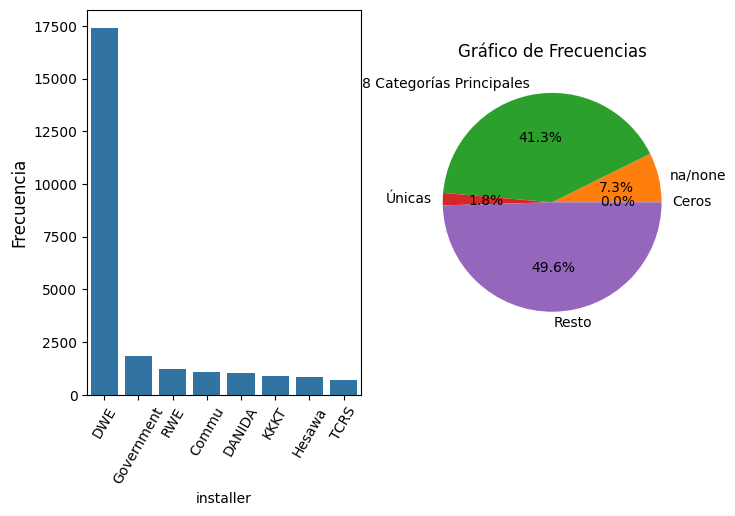

---------------------------------------------


In [17]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1

-------------- LONGITUDE ---------------
count    57588.000000
mean        35.149669
std          2.607428
min         29.607122
25%         33.285100
50%         35.005943
75%         37.233712
max         40.345193
Name: longitude, dtype: float64
longitude
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  1812
ceros:  0


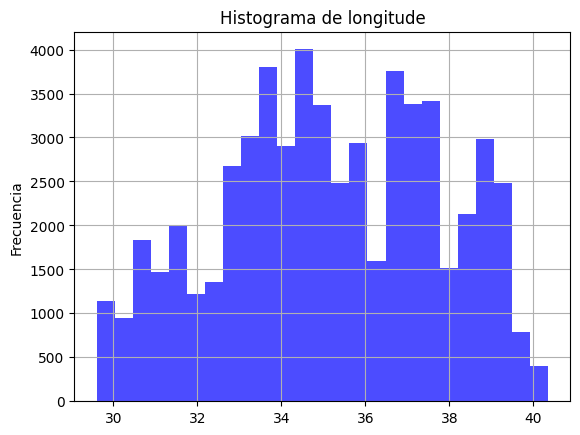

---------------------------------------------
7


In [18]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- LATITUDE ---------------
count    5.940000e+04
mean    -5.706033e+00
std      2.946019e+00
min     -1.164944e+01
25%     -8.540621e+00
50%     -5.021597e+00
75%     -3.326156e+00
max     -2.000000e-08
Name: latitude, dtype: float64
latitude
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  0
ceros:  0


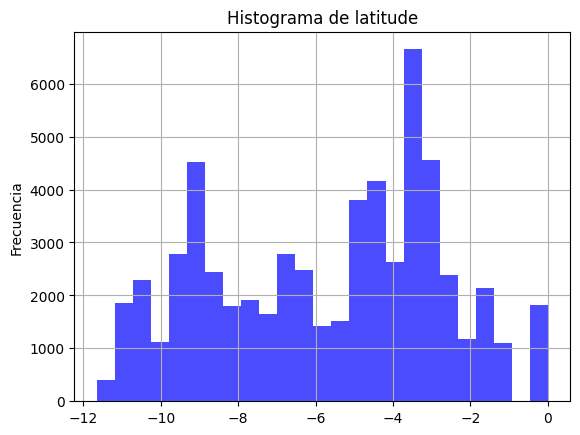

---------------------------------------------
8


In [19]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

In [20]:
# parece que hay 1812 registros con -2.000000e-08. Los ponemos como missings
df2['latitude'].replace(-2.000000e-08, np.nan, inplace = True)
print(df2['latitude'].isnull().sum())


1812


-------------- WPT_NAME ---------------
count     59398
unique    37399
top        none
freq       3563
Name: wpt_name, dtype: object
NaN:    2
none:   3563
ceros:  0
-------------- Head y Tail ---------------
wpt_name
none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Shule               152
Sekondari           146
Muungano            133
Mkombozi            111
Madukani            104
Name: count, dtype: int64
wpt_name
Kwa Medadi                 1
Kwa Kubembeni              1
Shule Ya Msingi Milanzi    1
Funua                      1
Kwa Mzee Lugawa            1
Name: count, dtype: int64


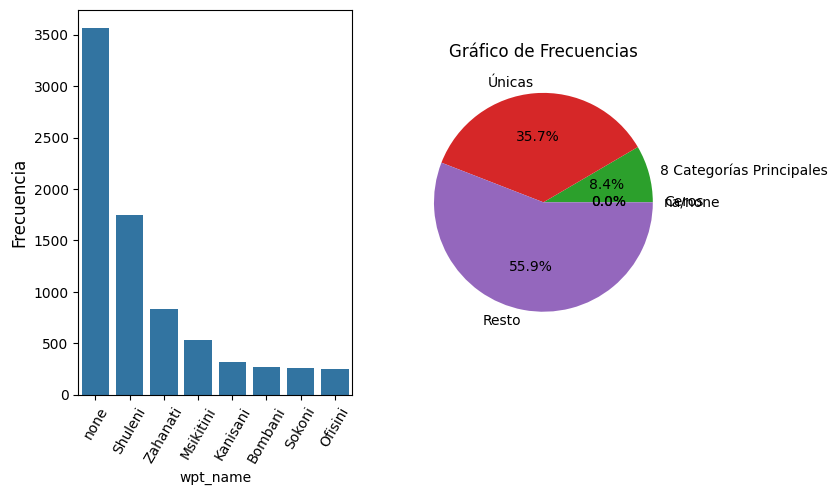

---------------------------------------------
9


In [21]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- NUM_PRIVATE ---------------
count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64
num_private
Atípicos inferiores: 0.0
Atípicos superiores: 1.2744107744107744
% valores atípicos: 1.2744107744107744
missings:  0
ceros:  58643


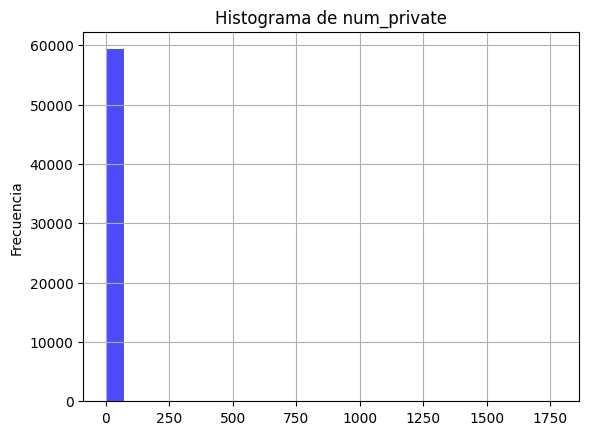

---------------------------------------------
10


In [22]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- BASIN ---------------
count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64
basin
Lake Tanganyika            6432
Wami / Ruvu                5987
Lake Nyasa                 5085
Ruvuma / Southern Coast    4493
Lake Rukwa                 2454
Name: count, dtype: int64


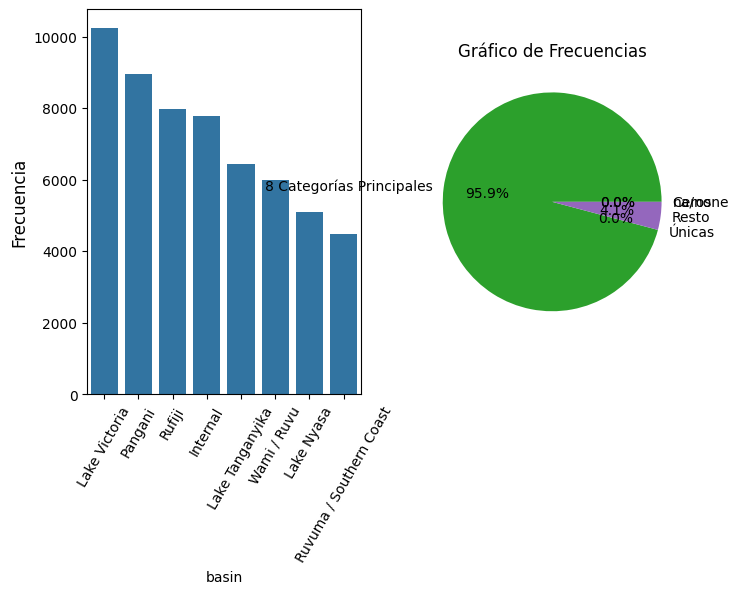

---------------------------------------------
11


In [23]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- SUBVILLAGE ---------------
count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object
NaN:    371
none:   0
ceros:  0
-------------- Head y Tail ---------------
subvillage
Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
Sokoni        232
M             187
Muungano      172
Mbuyuni       164
Mlimani       152
Songambele    147
Msikitini     134
Miembeni      134
1             132
Kibaoni       114
Name: count, dtype: int64
subvillage
Kipompo         1
Chanyamilima    1
Ikalime         1
Kemagaka        1
Kikatanyemba    1
Name: count, dtype: int64


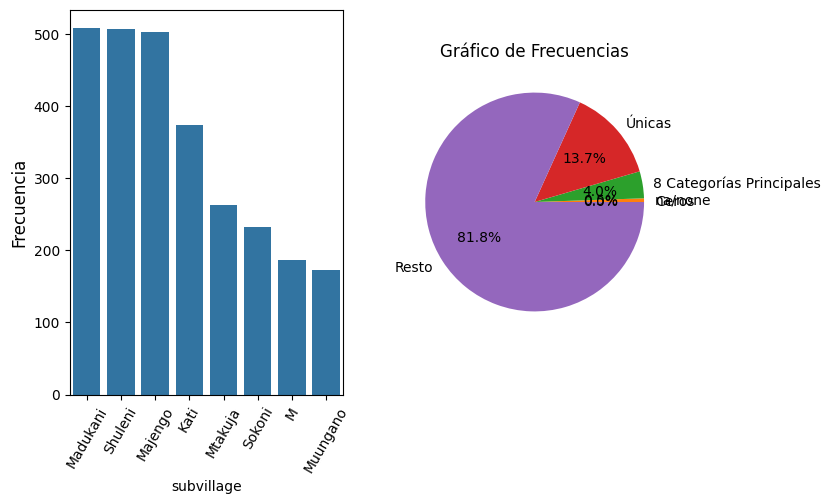

---------------------------------------------
12


In [24]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- REGION ---------------
count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
region
Iringa         5294
Shinyanga      4982
Mbeya          4639
Kilimanjaro    4379
Morogoro       4006
Arusha         3350
Kagera         3316
Mwanza         3102
Kigoma         2816
Ruvuma         2640
Pwani          2635
Tanga          2547
Dodoma         2201
Singida        2093
Mara           1969
Name: count, dtype: int64
region
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64


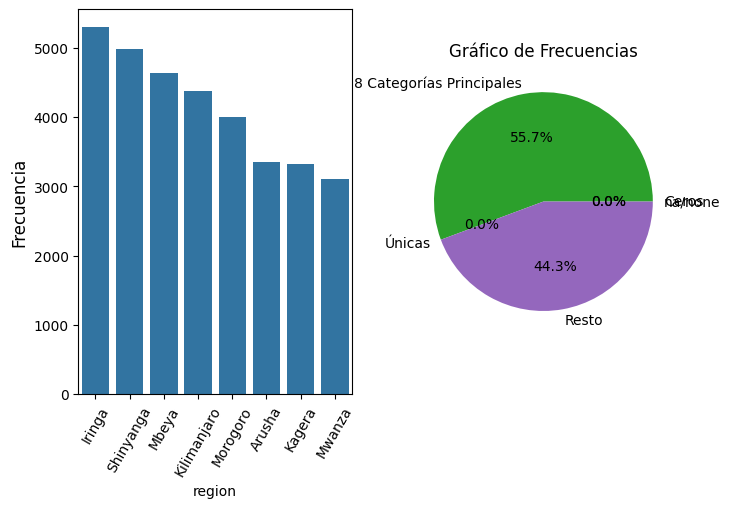

---------------------------------------------
13


In [25]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- REGION_CODE ---------------
count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64
region_code
Atípicos inferiores: 0.0
Atípicos superiores: 4.34006734006734
% valores atípicos: 4.34006734006734
missings:  0
ceros:  0


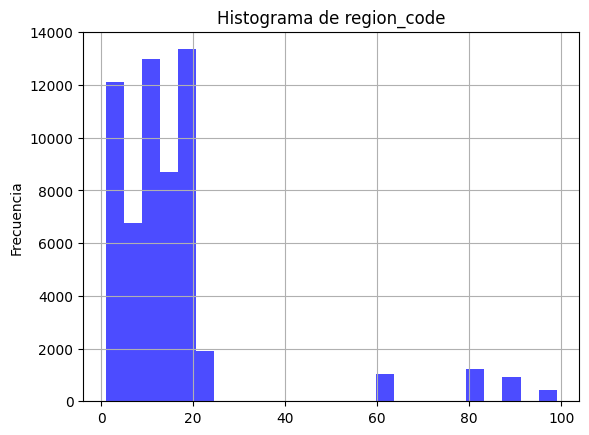

---------------------------------------------
14


In [26]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- DISTRICT_CODE ---------------
count    59400.000000
mean         5.629747
std          9.633649
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64
district_code
Atípicos inferiores: 0.0
Atípicos superiores: 6.392255892255892
% valores atípicos: 6.392255892255892
missings:  0
ceros:  23


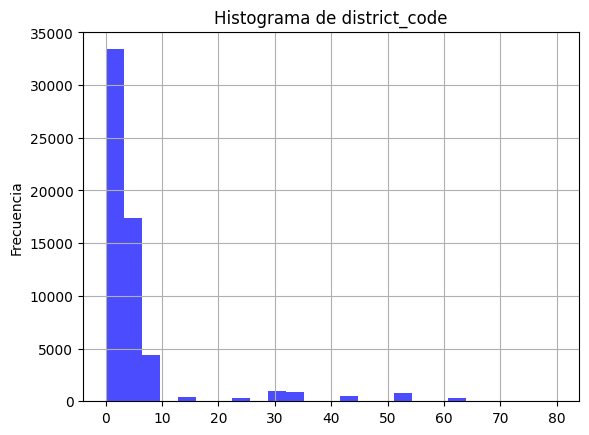

---------------------------------------------
15


In [27]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- LGA ---------------
count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
lga
Njombe           2503
Arusha Rural     1252
Moshi Rural      1251
Bariadi          1177
Rungwe           1106
Kilosa           1094
Kasulu           1047
Mbozi            1034
Meru             1009
Bagamoyo          997
Singida Rural     995
Kilombero         959
Same              877
Kibondo           874
Kyela             859
Name: count, dtype: int64
lga
Moshi Urban     79
Kigoma Urban    71
Arusha Urban    63
Lindi Urban     21
Nyamagana        1
Name: count, dtype: int64


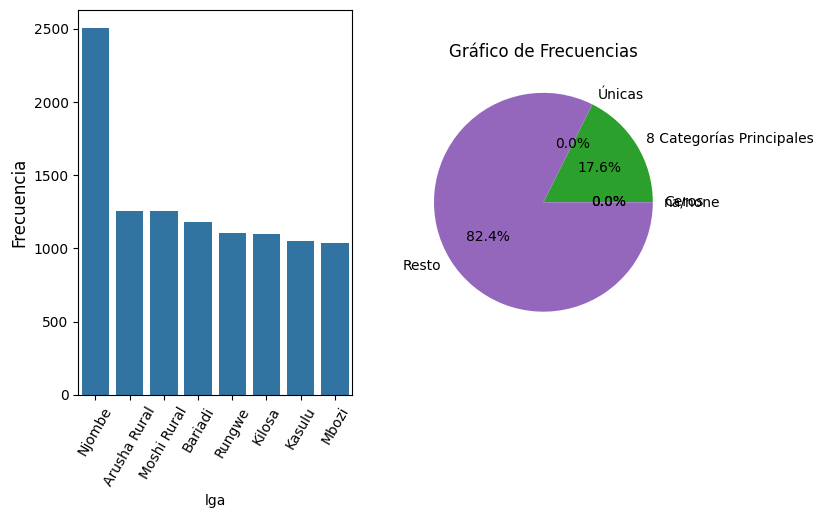

---------------------------------------------
16


In [28]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- WARD ---------------
count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
ward
Igosi           307
Imalinyi        252
Siha Kati       232
Mdandu          231
Nduruma         217
Mishamo         203
Kitunda         203
Msindo          201
Chalinze        196
Maji ya Chai    190
Usuka           187
Ngarenanyuki    172
Chanika         171
Vikindu         162
Mtwango         153
Name: count, dtype: int64
ward
Uchindile          1
Thawi              1
Uwanja wa Ndege    1
Izia               1
Kinungu            1
Name: count, dtype: int64


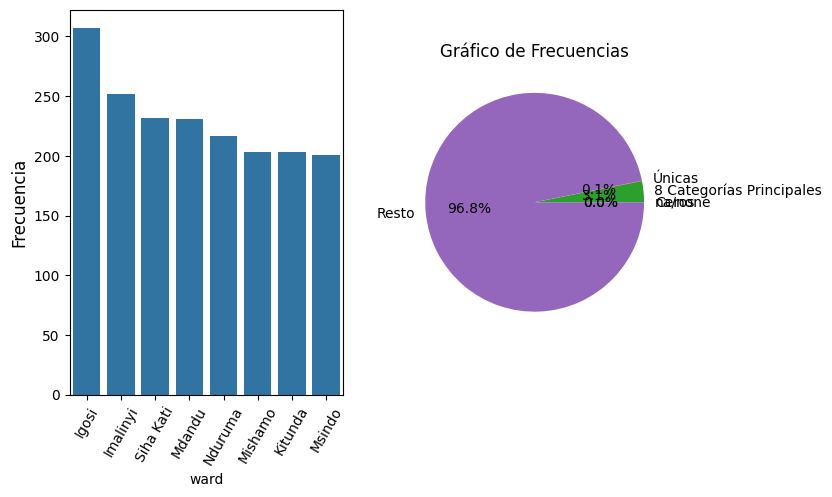

---------------------------------------------
17


In [29]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- POPULATION ---------------
count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64
population
Atípicos inferiores: 0.0
Atípicos superiores: 3.2962962962962963
% valores atípicos: 3.2962962962962963
missings:  0
ceros:  21381


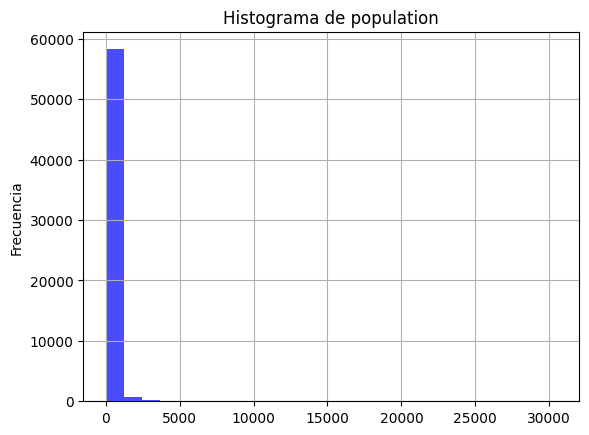

---------------------------------------------
18


In [30]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- PUBLIC_MEETING ---------------
count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object
NaN:    3334
none:   0
ceros:  0
-------------- Head y Tail ---------------
public_meeting
True     51011
False     5055
Name: count, dtype: int64
public_meeting
True     51011
False     5055
Name: count, dtype: int64


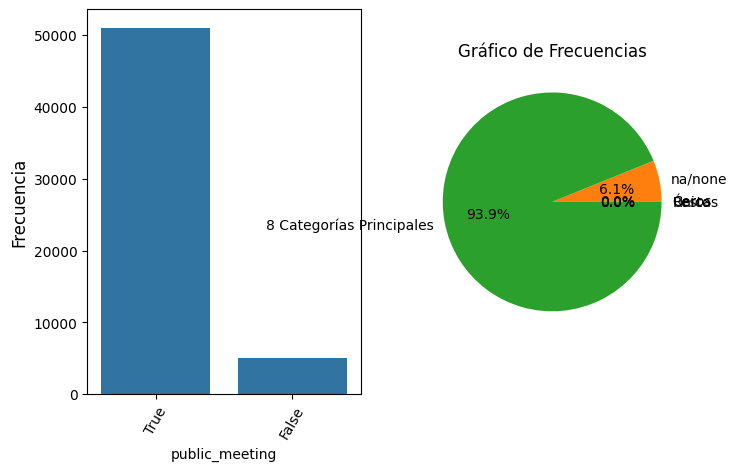

---------------------------------------------
19


In [31]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- RECORDED_BY ---------------
count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64
recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64


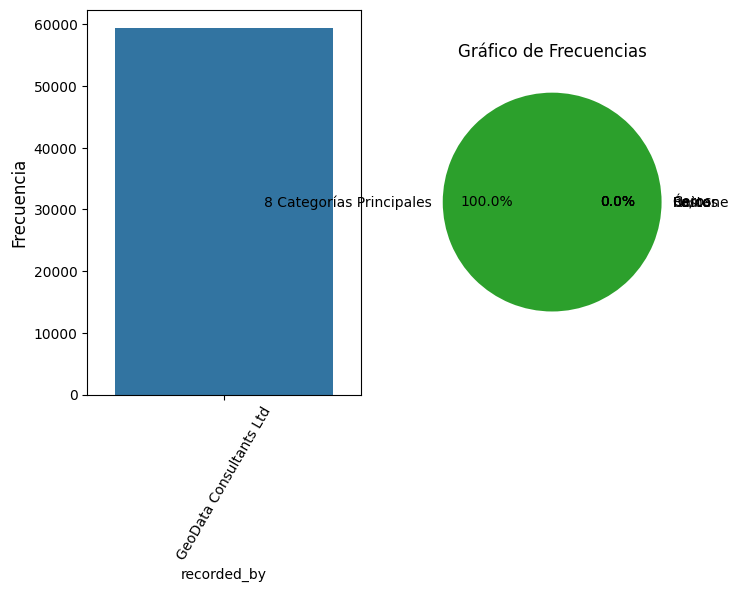

---------------------------------------------
20


In [32]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)


In [57]:
# La eliminaremos por tener solo un valor
df2.drop('recorded_by', axis = 1, inplace = True)

-------------- SCHEME_MANAGEMENT ---------------
count     55522
unique       11
top         VWC
freq      36793
Name: scheme_management, dtype: object
NaN:    3878
none:   0
ceros:  0
-------------- Head y Tail ---------------
scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64
scheme_management
Private operator    1063
Company             1061
Other                766
SWC                   97
Trust                 72
Name: count, dtype: int64


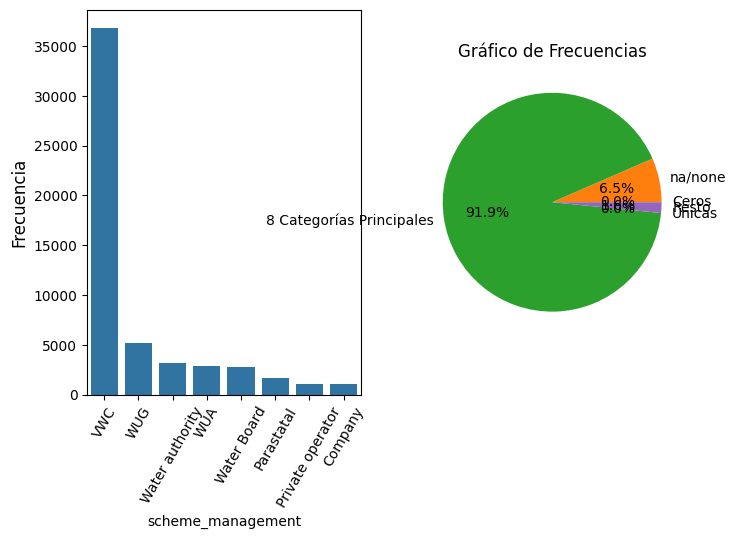

---------------------------------------------
21


In [34]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- SCHEME_NAME ---------------
count     30590
unique     2695
top           K
freq        682
Name: scheme_name, dtype: object
NaN:    28810
none:   25
ceros:  0
-------------- Head y Tail ---------------
scheme_name
K                                        682
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
Bagamoyo wate                            229
I                                        229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Name: count, dtype: int64
scheme_name
Mradi wa maji Vijini    1
Villagers               1
Magun

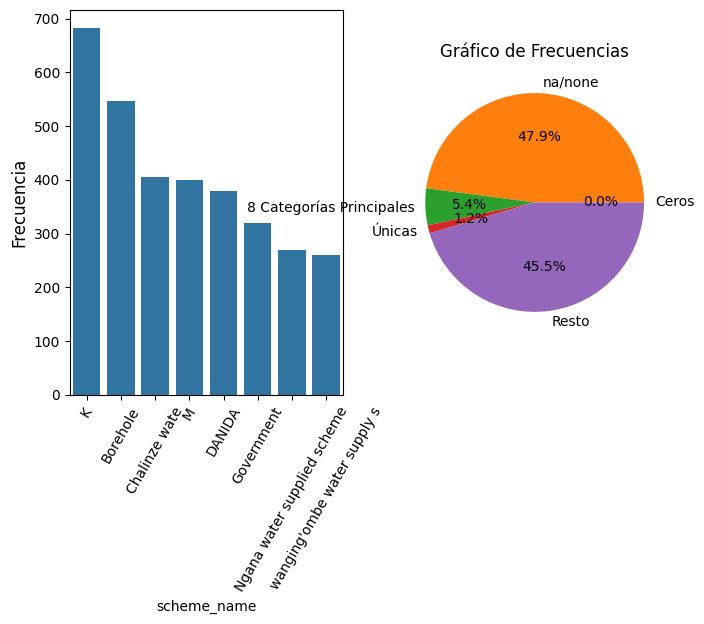

---------------------------------------------
22


In [35]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- PERMIT ---------------
count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object
NaN:    3056
none:   0
ceros:  0
-------------- Head y Tail ---------------
permit
True     38852
False    17492
Name: count, dtype: int64
permit
True     38852
False    17492
Name: count, dtype: int64


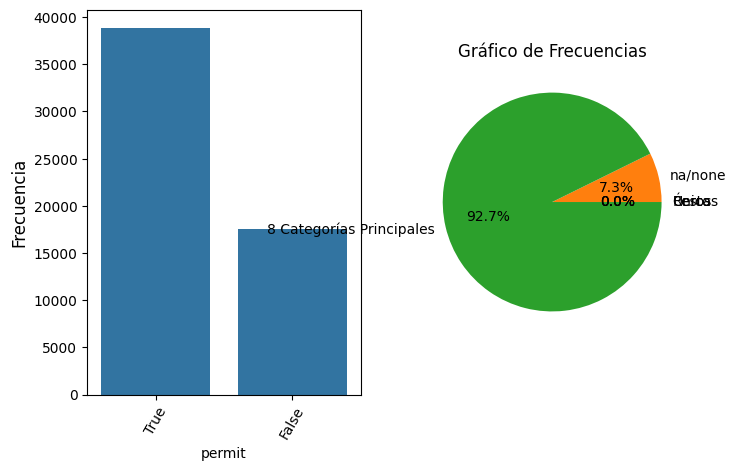

---------------------------------------------
23


In [36]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- CONSTRUCTION_YEAR ---------------
count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64
construction_year
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  20709
ceros:  0


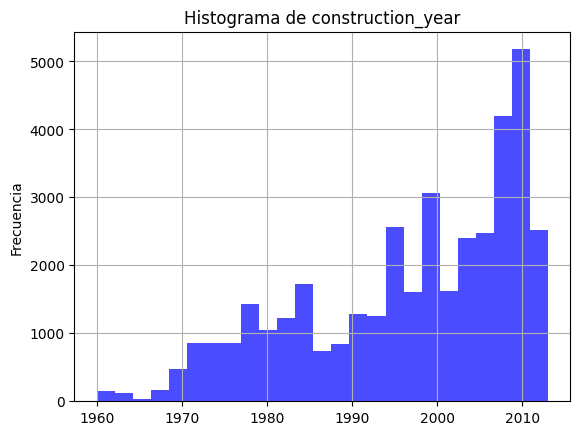

---------------------------------------------
24


In [37]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- EXTRACTION_TYPE ---------------
count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
extraction_type
gravity              26780
nira/tanira           8154
other                 6430
submersible           4764
swn 80                3670
mono                  2865
india mark ii         2400
afridev               1770
ksb                   1415
other - rope pump      451
other - swn 81         229
windmill               117
india mark iii          98
cemo                    90
other - play pump       85
Name: count, dtype: int64
extraction_type
cemo                         90
other - play pump            85
walimi                       48
climax                       32
other - mkulima/shinyanga     2
Name: count, dtype: int64


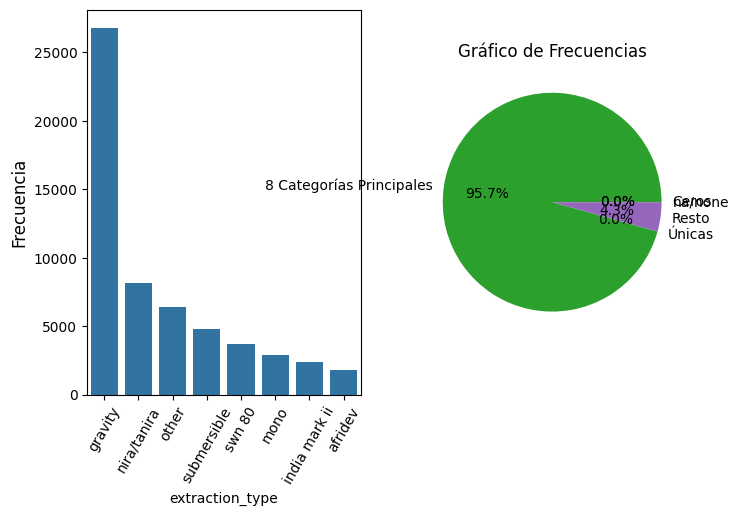

---------------------------------------------
25


In [39]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- EXTRACTION_TYPE_GROUP ---------------
count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64
extraction_type_group
rope pump          451
other handpump     364
other motorpump    122
wind-powered       117
india mark iii      98
Name: count, dtype: int64


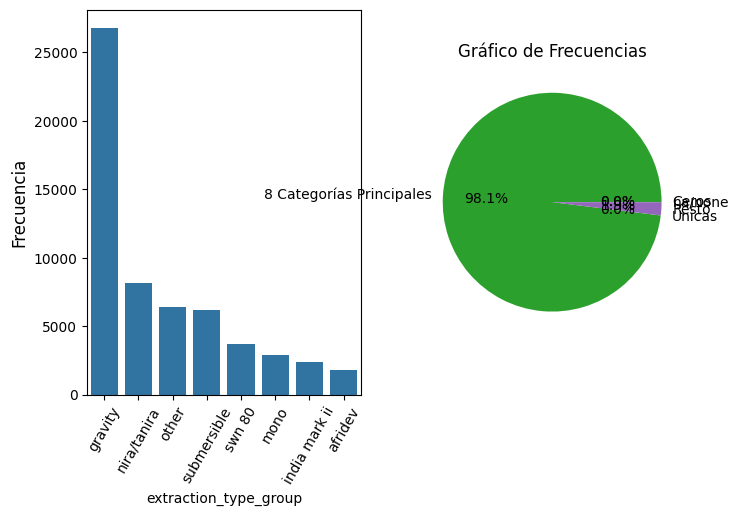

---------------------------------------------
26


In [40]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- EXTRACTION_TYPE_CLASS ---------------
count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64
extraction_type_class
other           6430
submersible     6179
motorpump       2987
rope pump        451
wind-powered     117
Name: count, dtype: int64


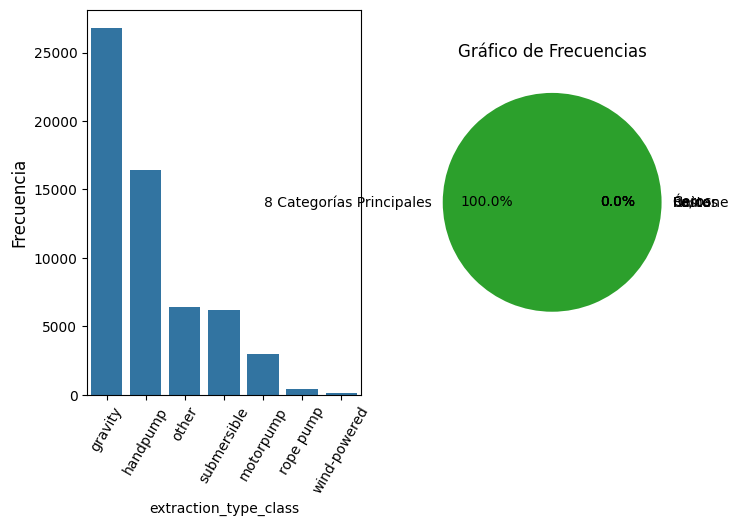

---------------------------------------------
27


In [41]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- MANAGEMENT ---------------
count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64
management
other             844
company           685
unknown           561
other - school     99
trust              78
Name: count, dtype: int64


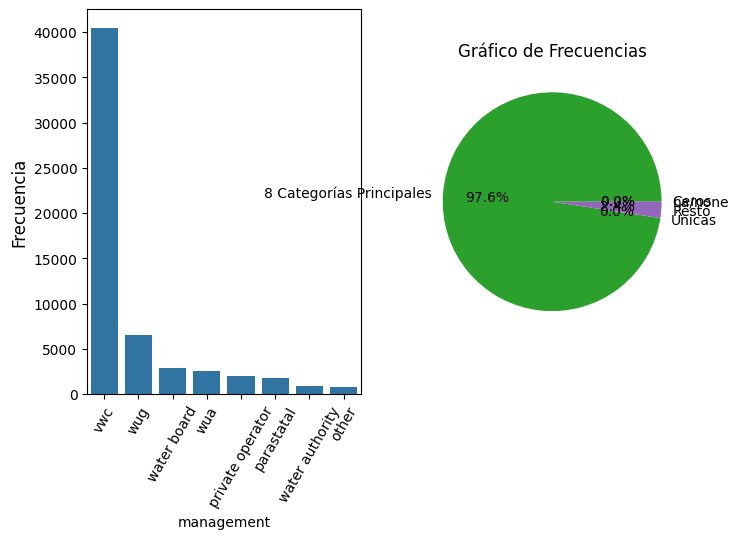

---------------------------------------------
28


In [42]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- MANAGEMENT_GROUP ---------------
count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64
management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64


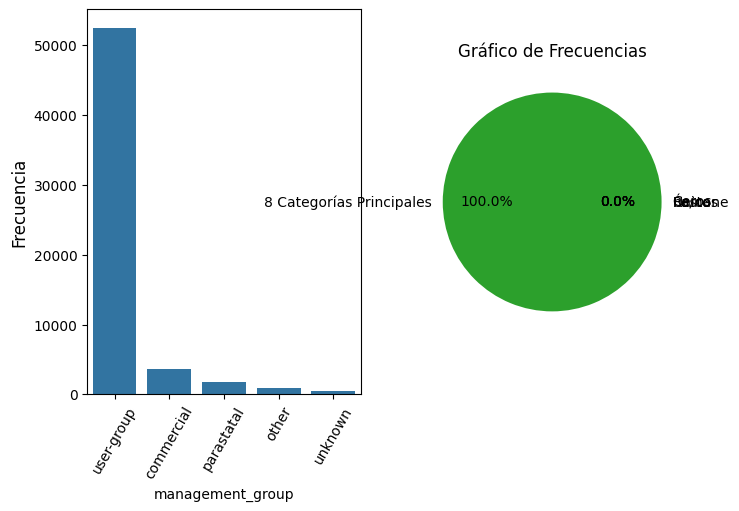

---------------------------------------------
29


In [43]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- PAYMENT ---------------
count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64
payment
pay monthly              8300
unknown                  8157
pay when scheme fails    3914
pay annually             3642
other                    1054
Name: count, dtype: int64


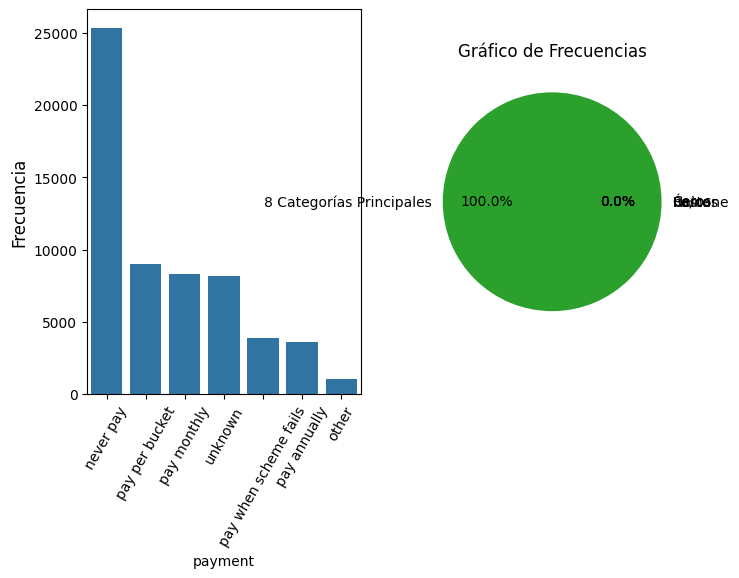

---------------------------------------------
30


In [44]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- PAYMENT_TYPE ---------------
count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64
payment_type
monthly       8300
unknown       8157
on failure    3914
annually      3642
other         1054
Name: count, dtype: int64


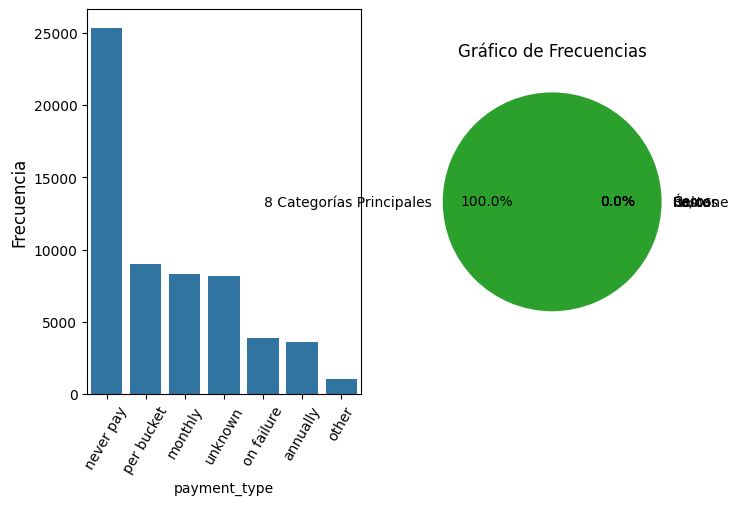

---------------------------------------------
31


In [45]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- WATER_QUALITY ---------------
count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64
water_quality
milky                 804
coloured              490
salty abandoned       339
fluoride              200
fluoride abandoned     17
Name: count, dtype: int64


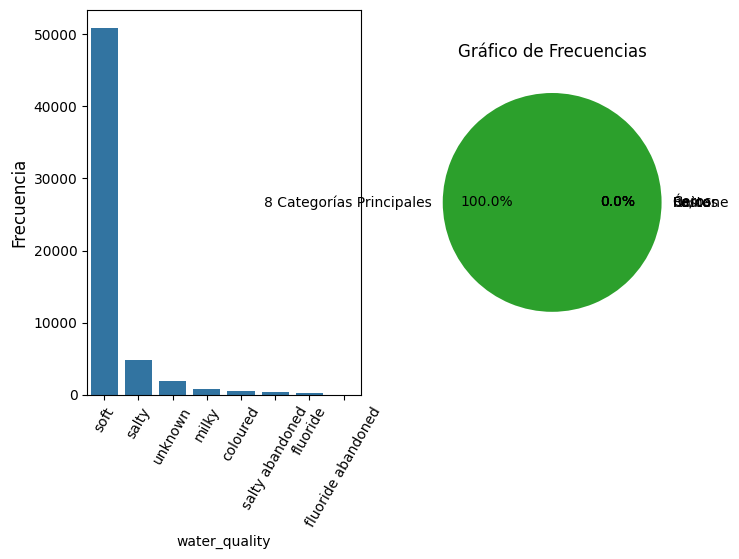

---------------------------------------------
32


In [46]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)


-------------- QUALITY_GROUP ---------------
count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64
quality_group
salty       5195
unknown     1876
milky        804
colored      490
fluoride     217
Name: count, dtype: int64


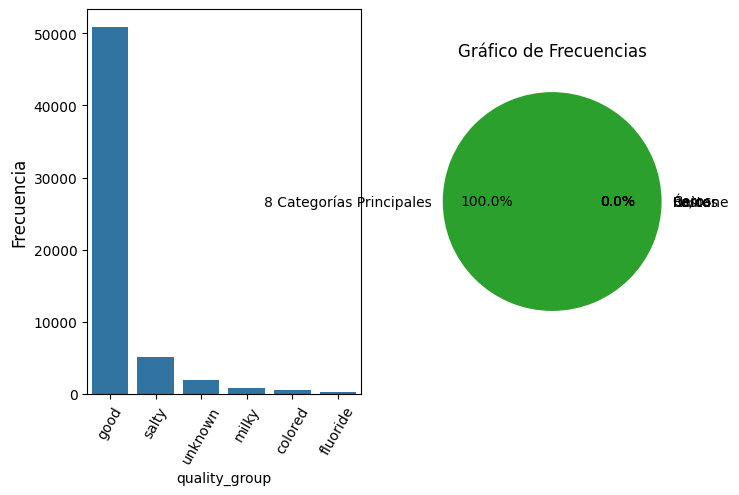

---------------------------------------------
33


In [47]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- QUANTITY ---------------
count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64
quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64


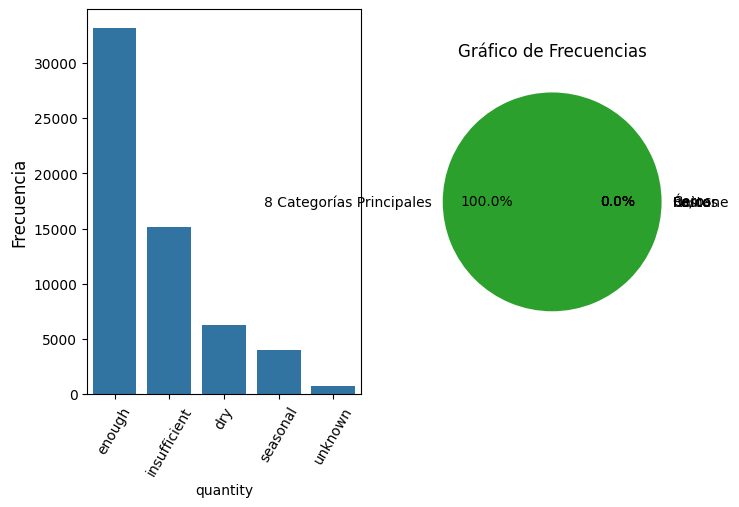

---------------------------------------------
34


In [48]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- QUANTITY_GROUP ---------------
count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64
quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64


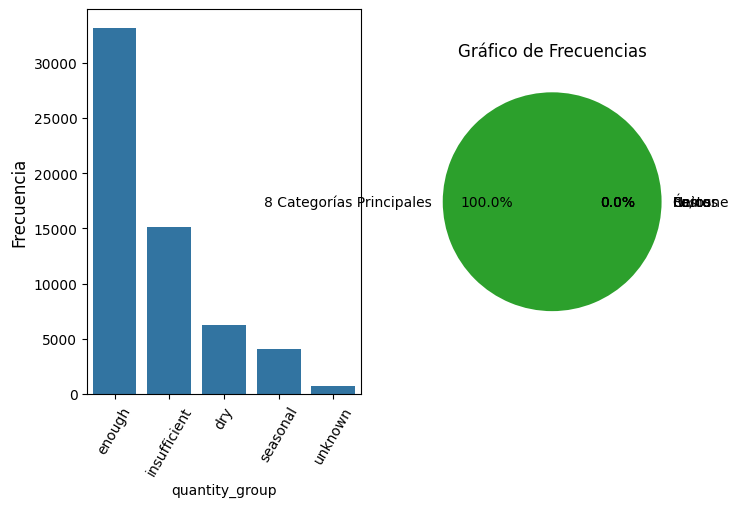

---------------------------------------------
35


In [49]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- SOURCE ---------------
count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64
source
hand dtw    874
lake        765
dam         656
other       212
unknown      66
Name: count, dtype: int64


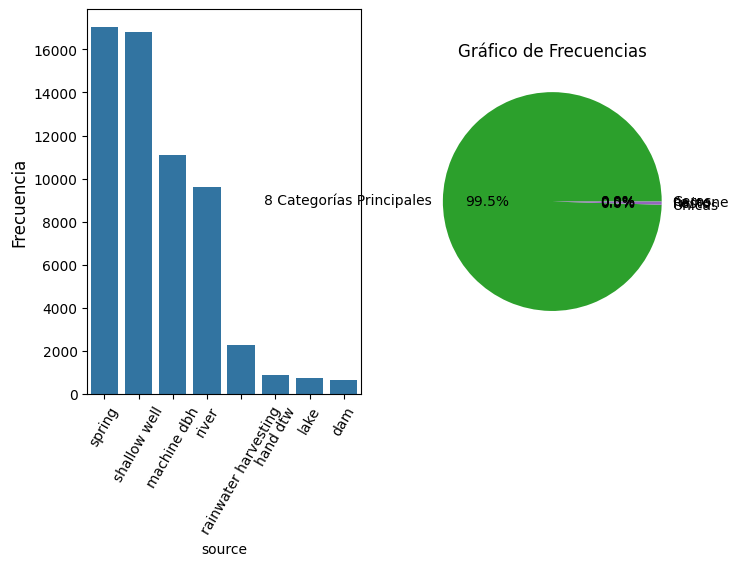

---------------------------------------------
36


In [50]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- SOURCE_TYPE ---------------
count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64
source_type
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64


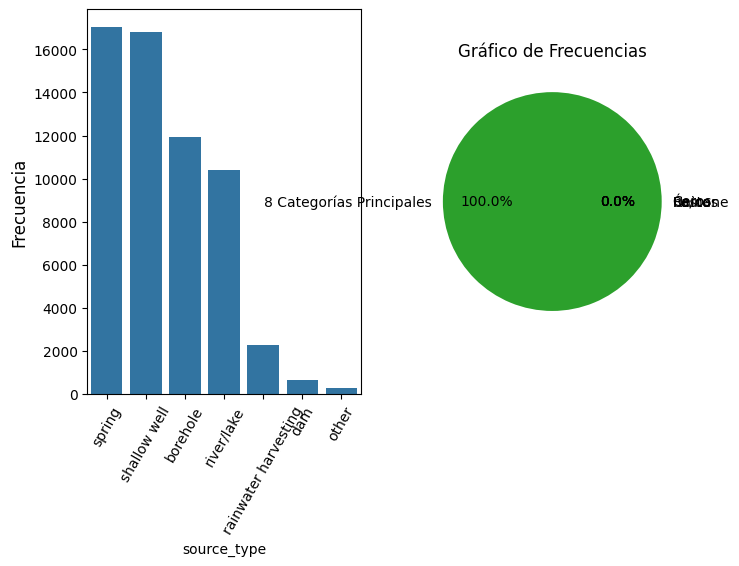

---------------------------------------------
37


In [51]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- SOURCE_CLASS ---------------
count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64
source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64


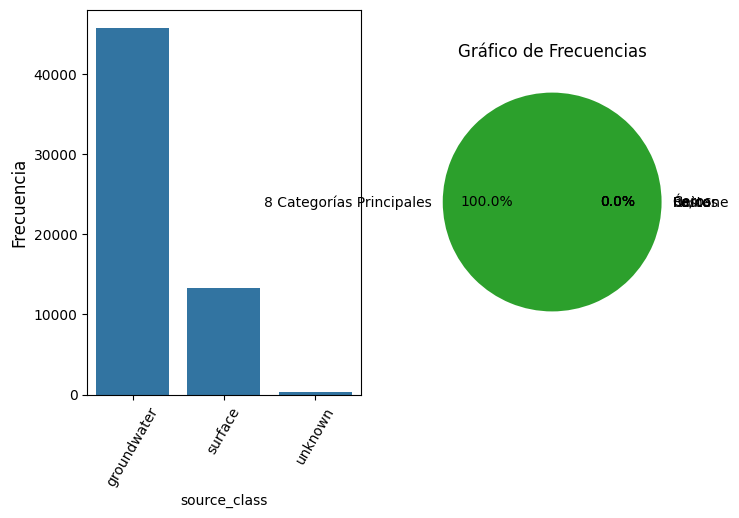

---------------------------------------------
38


In [52]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

-------------- WATERPOINT_TYPE ---------------
count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64
waterpoint_type
other                          6380
communal standpipe multiple    6103
improved spring                 784
cattle trough                   116
dam                               7
Name: count, dtype: int64


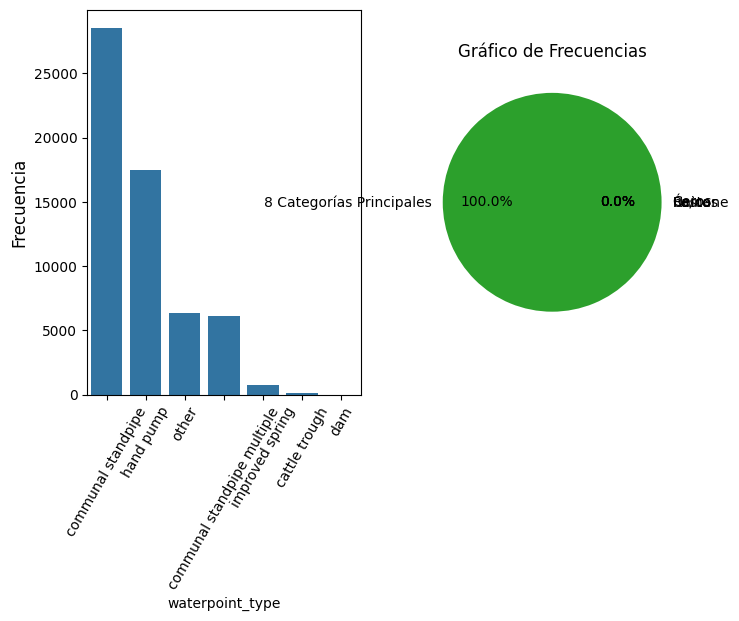

---------------------------------------------
39


In [53]:
# Exploramos los datos uno a uno 
lc = lista_col[i]
if (lc != 'date_recorded'):
    if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
        descripcion_categorica(df2, lc)
    else:                           # Analizamos las categóricas, excepto la de tipo datatime
        descripcion_numerica(df2, lc)
i = i + 1
print(i)

In [54]:
# Bucle para hacer lo de antes pero seguido
lista_col
if 0:
    for lc in lista_col: 
        if (lc != 'date_recorded'):
            if (df2[lc].dtypes == 'object'): # Analizamos las numéricas, excepto la de tipo datatime
                descripcion_categorica(df2, lc)
            else:                           # Analizamos las categóricas, excepto la de tipo datatime
                descripcion_numerica(df2, lc)

In [55]:
# Bien! ya tenemos la mayoría de los Nan. Voy a quitar muchas de las ultimas variables por ser muy similares. 
# Después terminaré de quitar Nan
# Hasta aqui voy a guardar este archivo como .pkl antes de seguir

df2.to_pickle("./pickles_temp/V3.pkl")
# df2.to_csv("training_V0_con_Nan.csv", index=False) # No lo guarda bien. Añade un 0 detras de cada int
